# FINAL PROJECT 2 : Logistic Regression dan SVM

Nama Anggota Kelompok :
- MUHAMAD ADITYA DARMAWAN (PYTN-KS18-01)
- AUDITA BELLA INTAN PUSPITA (PYTN-KS18-05)
- IVANKA STELLA AUDRIA (PYTN-KS18-08)

# 1. Perkenalan

## Latar Belakang

## Objective

# 2. Import Library

In [1]:
# Library for Preprocessing
 
import pandas as pd
import numpy as np

# Library for Visualization

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Library for Encoding Categorical Data

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Library for Splitting Data

from sklearn.model_selection import train_test_split, cross_val_score

# Library for Building Model 

from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Library for Evaluating Model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Library for Ignore Warnings

import warnings
warnings.filterwarnings('ignore')


# 3. Data Loading

### Import Dataset

In [2]:
# Load dataset weatherAUS.csv sebagai dataframe

df = pd.read_csv("weatherAUS.csv")

In [3]:
# Menampilkan value data teratas dari dataframe

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Menampilkan data terbawah

df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# Melihat Jumlah Baris dan Kolom 

df.shape

(145460, 23)

### Type of Data 

In [6]:
# Menampilkan informasi dari value column dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### View Data Statistical

In [7]:
# Menampilkan Deskripsi dari Dataframe yang telah dilakukan loading

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
# Melihat Informasi lebih detail mengenai struktur DataFrame kolom kategorikal (objek)
df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### Calculate Unique Values

In [9]:
# Menghitung nilai unique pada data
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

### Check Missing Values

In [10]:
# Checking Missing Value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Banyak mengandung missing value

In [11]:
#   Melihat Persentasi Missing Value
for col in df.columns:
    count_null = df[col].isnull().sum()
    total = len(df[col])
    presentase = (count_null/total)*100

    print(f'Kolom {col}')
    print(f'Jumlah null {count_null}')
    print(f'Presentase null : {presentase:.2f}%\n')

Kolom Date
Jumlah null 0
Presentase null : 0.00%

Kolom Location
Jumlah null 0
Presentase null : 0.00%

Kolom MinTemp
Jumlah null 1485
Presentase null : 1.02%

Kolom MaxTemp
Jumlah null 1261
Presentase null : 0.87%

Kolom Rainfall
Jumlah null 3261
Presentase null : 2.24%

Kolom Evaporation
Jumlah null 62790
Presentase null : 43.17%

Kolom Sunshine
Jumlah null 69835
Presentase null : 48.01%

Kolom WindGustDir
Jumlah null 10326
Presentase null : 7.10%

Kolom WindGustSpeed
Jumlah null 10263
Presentase null : 7.06%

Kolom WindDir9am
Jumlah null 10566
Presentase null : 7.26%

Kolom WindDir3pm
Jumlah null 4228
Presentase null : 2.91%

Kolom WindSpeed9am
Jumlah null 1767
Presentase null : 1.21%

Kolom WindSpeed3pm
Jumlah null 3062
Presentase null : 2.11%

Kolom Humidity9am
Jumlah null 2654
Presentase null : 1.82%

Kolom Humidity3pm
Jumlah null 4507
Presentase null : 3.10%

Kolom Pressure9am
Jumlah null 15065
Presentase null : 10.36%

Kolom Pressure3pm
Jumlah null 15028
Presentase null : 10.33

### Check Data Duplikasi

In [12]:
# Cek duplikasi data
df.duplicated().sum()

0

Tidak mengandung data terduplikasi

# 4. Data Cleaning

### Handling Missing Values

In [13]:
# Mengcopy dataframe untuk dilakukan cleaning 

df_clean = df.copy()

In [14]:
# Menampilkan baris teratas 

df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Hapus missing value yang presentasinya diatas 20%
Penghapusan kolom yang memiliki missing value diatas 20 persen dilakukan karena akan mengganggu pada mode. Adapun kolom yang dihapus sebagai berikut:
1. Sunshine dengan perentasi missing value 48.01%
2. Evaporation dengan presentasi missing value 43.17%
3. Cloud9am dengan presentase missing value 38.17%
4. Cloud3pm dengan presentase missing value 40.81%

In [15]:
# Menghapus missing value yang lebih dari 20%

df_clean.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [16]:
# Cek informasi column pada dataframe

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [17]:
# Cek kembali kolom yang mempunyai missing value 

df_clean.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
# Mengisi missing value dengan nilai mean

float_cols = df_clean.select_dtypes(include = ['float']).columns
cat_var = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in float_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
for col in cat_var:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [19]:
df_clean.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [20]:
# Drop missing value pada target

df_clean = df_clean[df_clean['RainTomorrow'].notna()]
df_clean.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-null  ob

Terjadi perubahan yang size awalnya 25,5 MB menjadi 21,7 MB

# 5. Data Exploration

Explorasi dilakukan dengan mencari variable x yang memiliki korelasi terhadap variable target 'RainTomorrow'

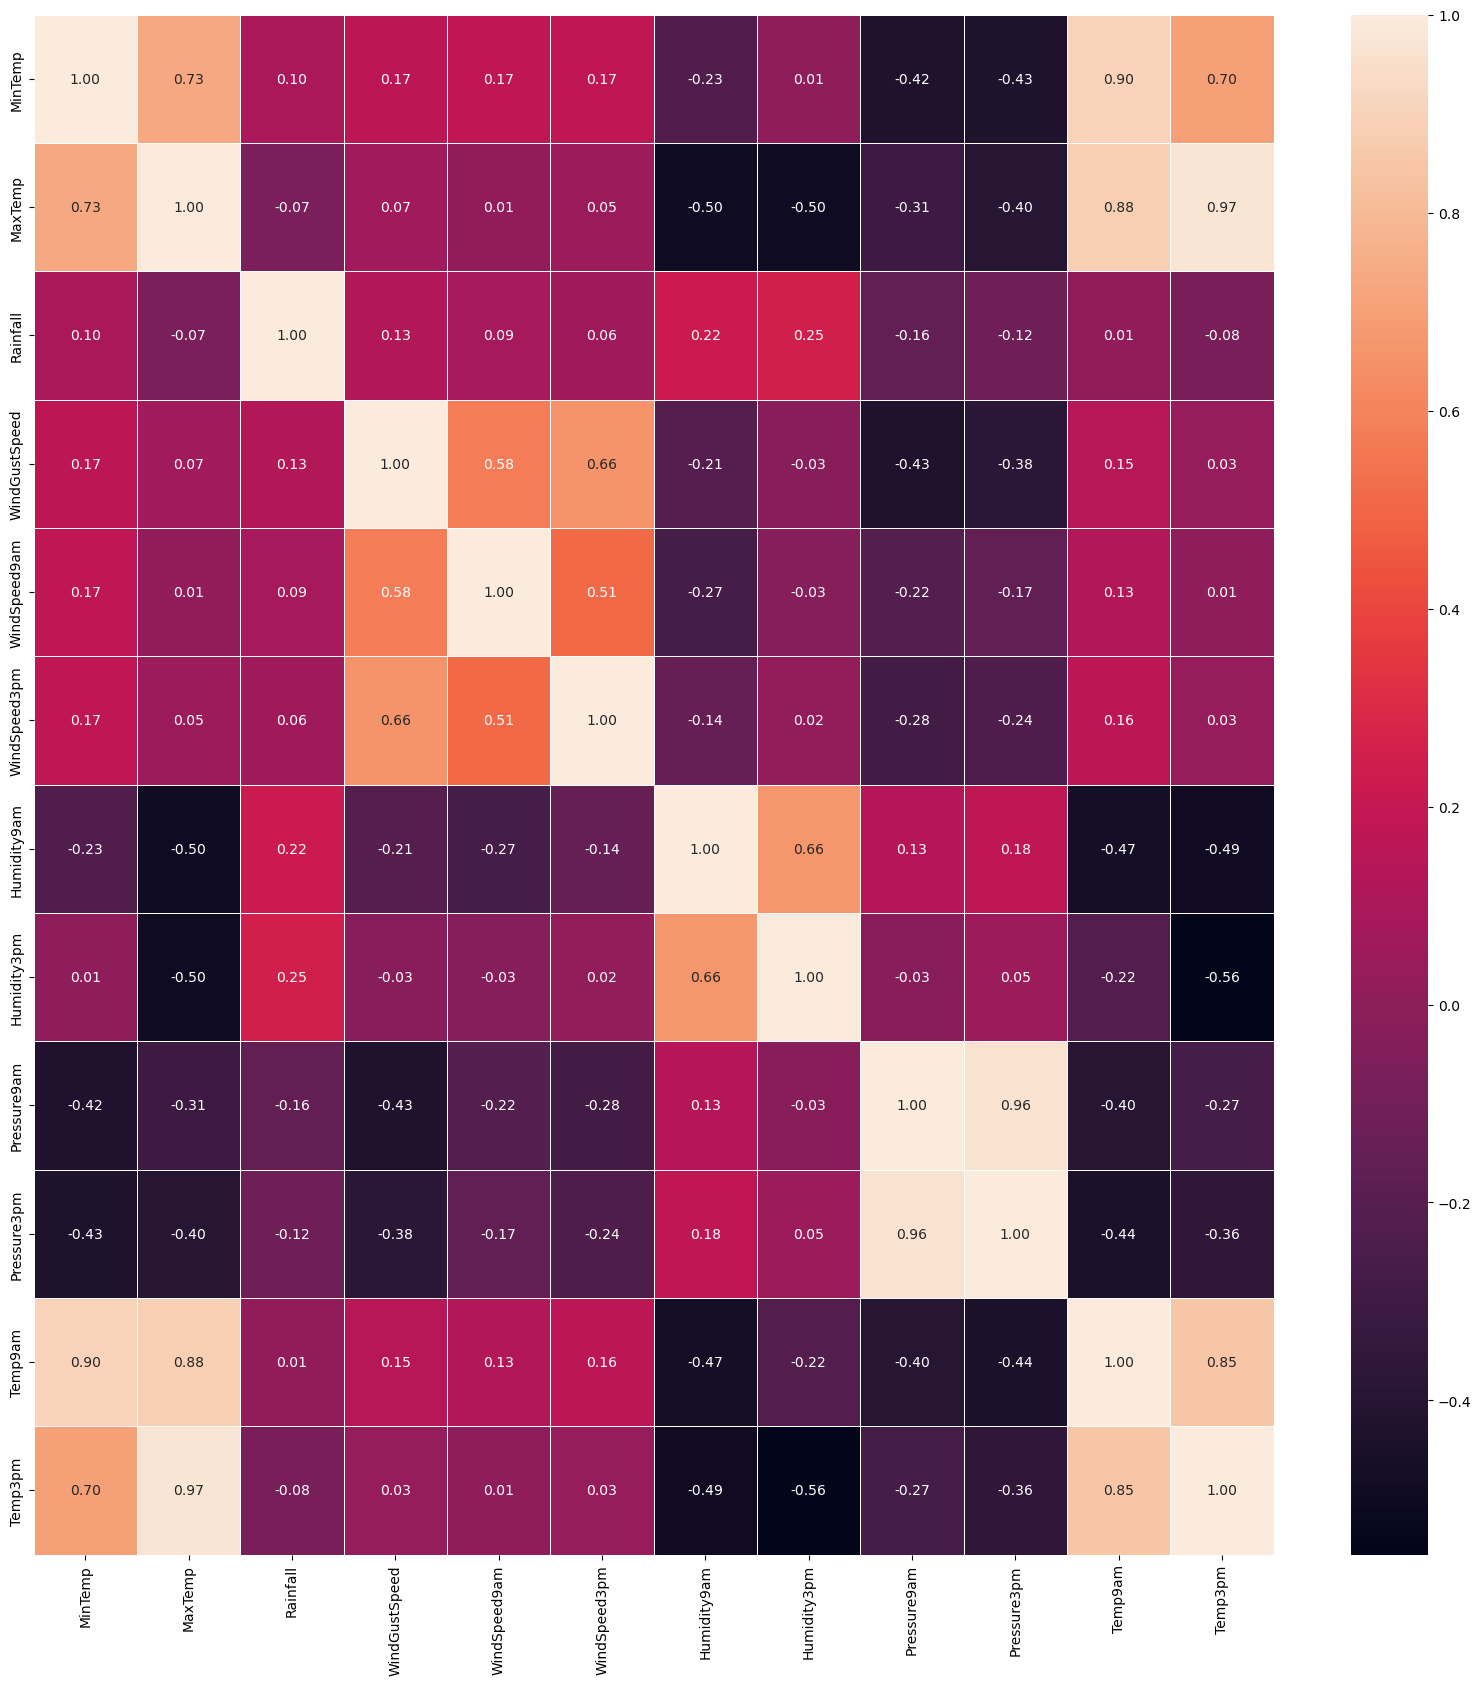

In [22]:
# Cek kembali matrix yang berkorelasi

# Memilih hanya kolom numerik

df_clean_num = df_clean.select_dtypes(include=['int64', 'float64'])

# Membuat hitmap

fig,ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df_clean_num.corr(), linewidths= .5, annot=True, fmt='.2f')

In [23]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Analisa Rain Tomorrow

In [24]:
# Analisa Rain Tomorrow sebagai Target

rain_tomorrow_type = df_clean['RainTomorrow'].value_counts(normalize=True)
rain_tomorrow_type

RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64

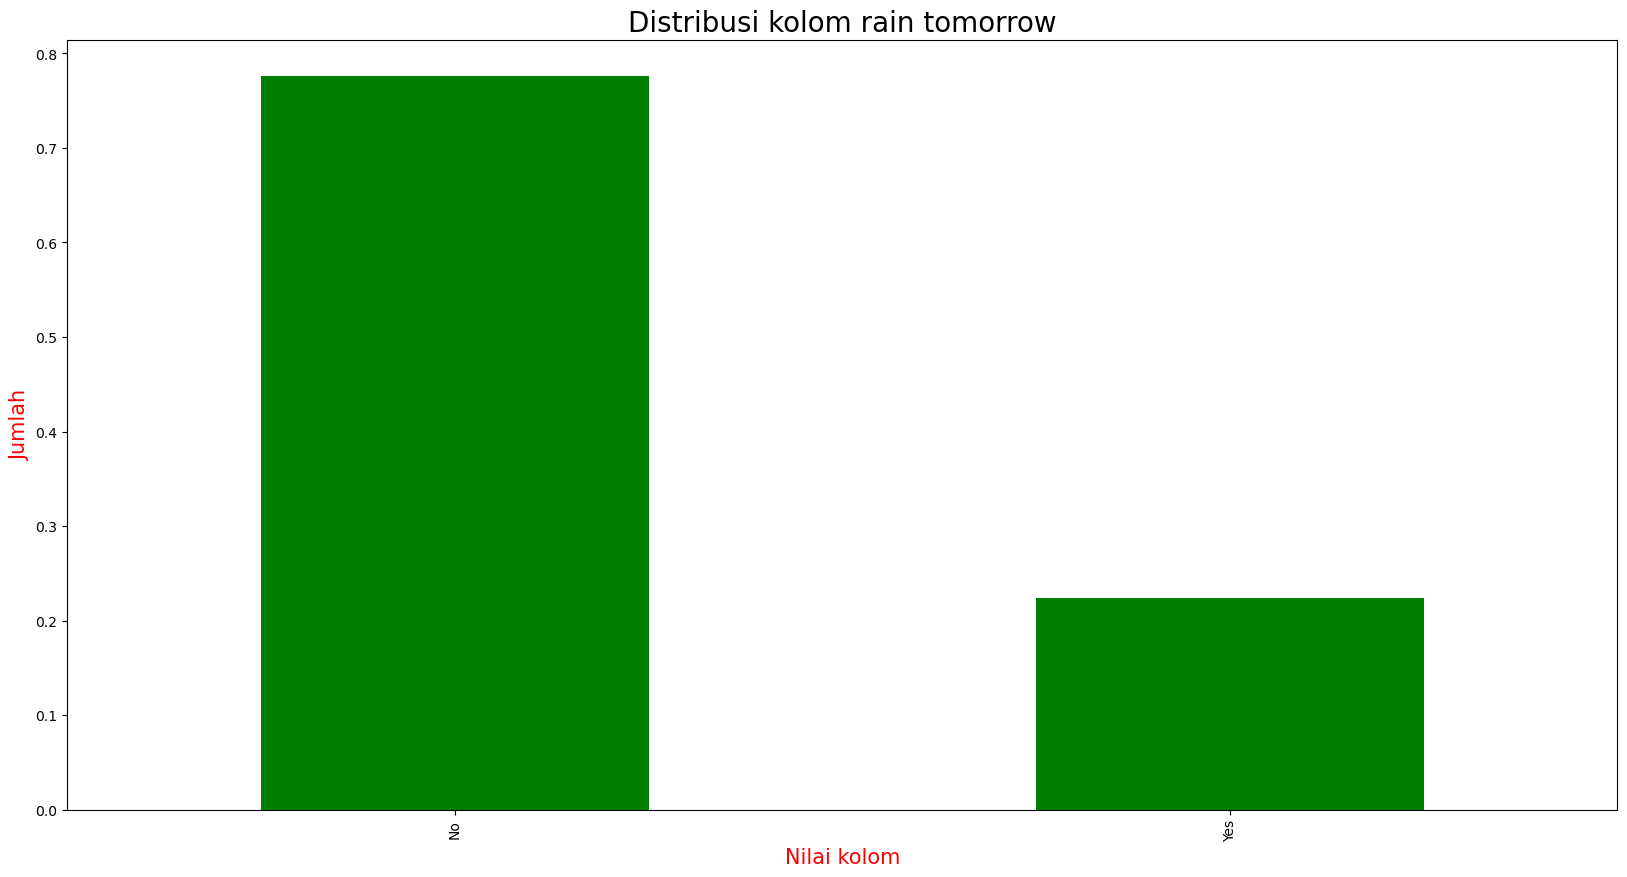

In [27]:
# Pemodelan bentuk bar

rain_tomorrow_type.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Distribusi kolom rain tomorrow', fontsize = 20)
# nama xlabel
plt.xlabel('Nilai kolom', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

- Pada kolom rain tomorrow terdapat 2 value yaitu yes dan no
- Yes menunjukkan besok akan hujan
- No menunjukkan besok tidak akan hujan
- Distrubusi value yes sebesar 22.4%
- Distribusi value no sebesar 77.6%

### Analisasi Pengaruh Kolom Date terhadap Rain Tomorrow

In [29]:
corel_date = df_clean.loc[: , ['Date', 'RainTomorrow']]
corel_date

,Date,RainTomorrow
0,2008-12-01,No
1,2008-12-02,No
2,2008-12-03,No
3,2008-12-04,No
4,2008-12-05,No
...,...,...
145454,2017-06-20,No
145455,2017-06-21,No
145456,2017-06-22,No
145457,2017-06-23,No


In [ ]:
# Encode 

df_encode = preprocessing.LabelEncoder()

corelMinMaxTemp_encode = 

# 6. Data Preprocessing

# 7. Model Defiation

# 8. Pelatihan Model

# 9. Evaluasi Model

# 10. Model Inference

# 11. Kesimpulan